<h2>🛒 FreshCart Churn Prediction - EDA</h2>
 
<h4>
    <b>
        Zero2End Machine Learning Bootcamp - Bitirme Projesi
    </b>
</h4>

<h4>
    Notebook İçeriği
</h4>

<h5>
    <ol>
        <li>Problem Tanımı ve İş Bağlamı</li>
        <li>Veri Yükleme ve İlk Bakış</li>
        <li>Veri Kalitesi Analizi</li>
        <li>Tek Değişkenli Analiz</li>
        <li>İki Değişkenli Analiz</li>
        <li>Çok Değişkenli Analiz</li>
        <li>Müşteri Kaybı (Churn) Analizi</li>
        <li>EDA Bulguları ve Öneriler</li>
    </ol>
</h5>

<h2>1-Problem Tanımı ve İş Bağlamı</h2>

<h4>İş Problemi</h4>

<p><b>FreshCart</b> bir online market ve yemek teslimat platformudur. Şirket yönetimi, müşteri kaybı oranının son 6 ayda <b>%18'den %23'e</b> yükseldiğini fark etmiştir.</p>

<b>CEO'dan Gelen Talep:</b>
<blockquote>Pazarlama ekibimiz, müşteri elde tutma kampanyaları için büyük bir bütçe talep ediyor, ancak kimi hedefleyeceğimizi bilmiyoruz. Veri bilimi ekibinin, müşteri kaybı riski yüksek olan müşterileri <b>2 hafta önceden</b> tahmin edebilen bir sistem kurmasını bekliyoruz.</blockquote>

<h4>İş Etkisi</h4>
<ul>
    <li><b>Ortalama Müşteri Değeri:</b> 150$/ay</li>
    <li><b>Müşteri Edinme Maliyeti:</b> 45$</li>
    <li><b>Müşteriyi Elde Tutma Kampanyası Maliyeti:</b> 10$</li>
    <li><b>Hedeflenen Müşteri Kaybı Oranı:</b> %18</li>
</ul>

<b>Potansiyel Gelir Kaybı:</b>
<ul>
    <li>Mevcut kayıp: %23 → ~47.000 müşteri/yıl</li>
    <li>Hedeflenen kayıp: %18 → ~37.000 müşteri/yıl</li>
    <li><b>Kazanç:</b> 10.000 müşteri × 150$ = <b>1.5 Milyon $/yıl</b></li>
</ul>

<h4>Veri Seti: Instacart Market Sepeti Analizi</h4>
<ul>
    <li><b>3+ milyon</b> sipariş</li>
    <li><b>200.000+</b> kullanıcı</li>
    <li><b>50.000+</b> ürün</li>
    <li>Gerçek e-ticaret verisi (sentetik değil)</li>
</ul>

<h4>Proje Hedefleri</h4>
<ol>
    <li>Müşteri kaybını <b>%85+ doğrulukla</b> tahmin etme</b></li>
    <li>Müşteri kaybına yol açan faktörleri belirleme</li>
    <li>Bir risk skoru hesaplama (0-100)</li>
    <li>Uygulanabilir içgörüler sunma</li>
</ol>

In [1]:
# Kütüphane importları
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys 

In [2]:
# Görselleştirme ayarları
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")
warnings.filterwarnings('ignore')

In [3]:
# Görüntüleme ayarları
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# src'yi yola ekle
sys.path.append('../src')

In [5]:
# Özel modülleri import et
# Not: Bu komut dosyası çalıştırıldığında config ve data.data_loader modüllerinin ../src altında bulunması gerekir.
from config import RAW_DATA_DIR, CHURN_DEFINITION
from data.data_loader import InstacartDataLoader

print("Kütüphaneler başarıyla import edildi!")
print(f"Veri dizini: {RAW_DATA_DIR}")

Kütüphaneler başarıyla import edildi!
Veri dizini: d:\egitim_ve_calismalar\Lodos Makine Öğrenmesi Bootcamp 02.11.2025\html\FreshCart-Churn-Prediction\notebooks\..\data\raw


<h2>2-Veri Yükleme ve İlk Bakış</h2>

In [6]:
# Veri yükleyiciyi başlat
loader = InstacartDataLoader(RAW_DATA_DIR)

In [7]:
# Tüm veri setlerini yükle
data = loader.load_all_data()

INFO:data.data_loader:Instacart veri setleri yükleniyor...
INFO:data.data_loader:Yükleniyor: orders.csv...
INFO:data.data_loader:Yüklendi orders: (3421083, 7)
INFO:data.data_loader:Yükleniyor: order_products__prior.csv...
INFO:data.data_loader:Yüklendi order_products_prior: (32434489, 4)
INFO:data.data_loader:Yükleniyor: order_products__train.csv...
INFO:data.data_loader:Yüklendi order_products_train: (1384617, 4)
INFO:data.data_loader:Yükleniyor: products.csv...
INFO:data.data_loader:Yüklendi products: (49688, 4)
INFO:data.data_loader:Yükleniyor: aisles.csv...
INFO:data.data_loader:Yüklendi aisles: (134, 2)
INFO:data.data_loader:Yükleniyor: departments.csv...
INFO:data.data_loader:Yüklendi departments: (21, 2)
INFO:data.data_loader:Tüm veri setleri başarıyla yüklendi!

INFO:data.data_loader:================================================================================
INFO:data.data_loader:VERİ ÖZETİ
INFO:data.data_loader:=============================================================

In [8]:
# Veri bilgisini al
info = loader.get_data_info()

In [10]:
print("\n" + "="*80)
print("VERİ SETİ İSTATİSTİKLERİ")
print("="*80)
for key, value in info.items():
    print(f"{key:30s}: {value:>15,}" if isinstance(value, int) else f"{key:30s}: {value}")
print("="*80)


VERİ SETİ İSTATİSTİKLERİ
total_orders                  :       3,421,083
total_users                   :         206,209
total_products                :          49,688
total_aisles                  :             134
total_departments             :              21
avg_orders_per_user           : 16.590367054784224
date_range                    : (np.int64(0), np.int64(6))


In [11]:
# Her tablodan örnek veri gösterimi
print("\n Her Tablodan Örnek Veri:\n")

for name, df in data.items():
    print(f"\n{'='*80}")
    print(f"{name.upper()}")
    print(f"{'='*80}")
    print(f"Shape: {df.shape}")
    print(f"\nİlk 3 satır:")
    display(df.head(3))
    print(f"\nVeri tipleri:")
    print(df.dtypes)


 Her Tablodan Örnek Veri:


ORDERS
Shape: (3421083, 7)

İlk 3 satır:


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.000
2,473747,1,prior,3,3,12,21.000



Veri tipleri:
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

ORDER_PRODUCTS_PRIOR
Shape: (32434489, 4)

İlk 3 satır:


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0



Veri tipleri:
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

ORDER_PRODUCTS_TRAIN
Shape: (1384617, 4)

İlk 3 satır:


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0



Veri tipleri:
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

PRODUCTS
Shape: (49688, 4)

İlk 3 satır:


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7



Veri tipleri:
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

AISLES
Shape: (134, 2)

İlk 3 satır:


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars



Veri tipleri:
aisle_id     int64
aisle       object
dtype: object

DEPARTMENTS
Shape: (21, 2)

İlk 3 satır:


,department_id,department
0,1,frozen
1,2,other
2,3,bakery



Veri tipleri:
department_id     int64
department       object
dtype: object


<h2>
    3-Veri Kalitesi Analizi
</h2>

In [12]:
def analyze_data_quality(df: pd.DataFrame, name: str) -> pd.DataFrame:
    """
    Bir DataFrame'in veri kalitesini analiz eder.
    """
    quality_df = pd.DataFrame({
        'Column': df.columns,
        'Dtype': df.dtypes.values,
        'Missing': df.isnull().sum().values,
        'Missing_Pct': (df.isnull().sum() / len(df) * 100).values,
        'Unique': df.nunique().values,
        'Unique_Pct': (df.nunique() / len(df) * 100).values
    })
    
    print(f"\nVeri Kalitesi Raporu: {name}")
    print(f"{'='*80}")
    print(f"Toplam Satır: {len(df):,}")
    print(f"Toplam Sütun: {len(df.columns)}")
    print(f"Eksik Değerler: {df.isnull().sum().sum():,} ({df.isnull().sum().sum() / df.size * 100:.2f}%)")
    print(f"Tekrarlayan Satırlar: {df.duplicated().sum():,}")
    print(f"\n{quality_df.to_string()}\n")
    
    return quality_df

In [13]:
# Her veri setini analiz et
for name, df in data.items():
    quality_report = analyze_data_quality(df, name)


Veri Kalitesi Raporu: orders
Toplam Satır: 3,421,083
Toplam Sütun: 7
Eksik Değerler: 206,209 (0.86%)
Tekrarlayan Satırlar: 0

                   Column    Dtype  Missing  Missing_Pct   Unique  Unique_Pct
0                order_id    int64        0        0.000  3421083     100.000
1                 user_id    int64        0        0.000   206209       6.028
2                eval_set   object        0        0.000        3       0.000
3            order_number    int64        0        0.000      100       0.003
4               order_dow    int64        0        0.000        7       0.000
5       order_hour_of_day    int64        0        0.000       24       0.001
6  days_since_prior_order  float64   206209        6.028       31       0.001


Veri Kalitesi Raporu: order_products_prior
Toplam Satır: 32,434,489
Toplam Sütun: 4
Eksik Değerler: 0 (0.00%)
Tekrarlayan Satırlar: 0

              Column  Dtype  Missing  Missing_Pct   Unique  Unique_Pct
0           order_id  int64        0     

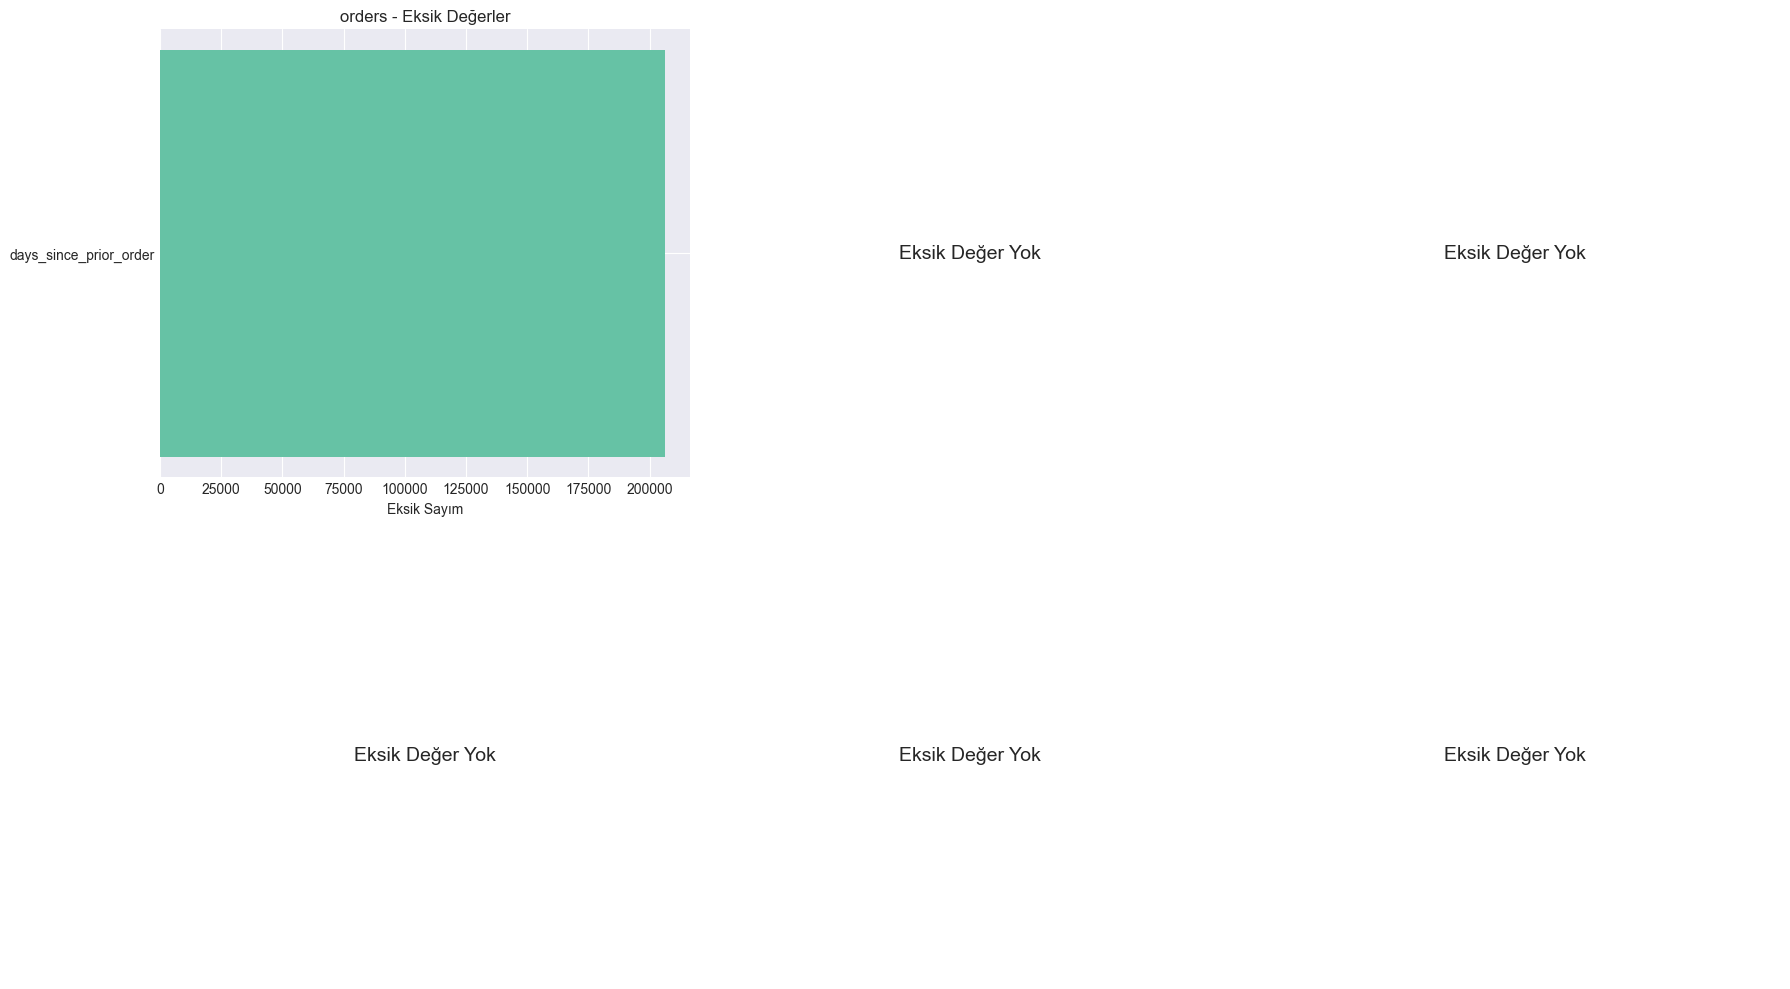

In [20]:
# Eksik değer görselleştirmesi
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, (name, df) in enumerate(data.items()):
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    
    if len(missing) > 0:
        axes[idx].barh(missing.index, missing.values)
        axes[idx].set_xlabel('Eksik Sayım')
        axes[idx].set_title(f'{name} - Eksik Değerler')
    else:
        axes[idx].text(0.5, 0.5, 'Eksik Değer Yok', 
                       ha='center', va='center', fontsize=14)
        axes[idx].set_xlim(0, 1)
        axes[idx].set_ylim(0, 1)
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('../plots/01_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

<h3>Grafik Yorumu: Eksik Değerlerin Görselleştirilmesi</h3>

<p>
Bu grafik, analizde kullanılan farklı veri setlerindeki eksik değerlerin (NaN veya boş hücrelerin) dağılımını ve miktarını göstermektedir. Grafik, toplamda altı adet alt grafikten oluşur ve her bir alt grafik, farklı bir veri setini temsil eder.
</p>

<h4>Grafiği Nasıl Okumalıyım?</h4>

<h5>1. Her Bir Alt Grafik Bir Veri Setidir:</h5>
<p>
Grafiğin başlığı (<code>{name} - Eksik değerler</code>), hangi veri setine bakmakta olduğunuzu belirtir.
</p>

<h5>2. Dikey Eksen (Y Ekseni):</h5>
<p>
Bu eksende, içinde en az bir eksik değer bulunan sütunların (özniteliklerin) isimleri listelenir.
</p>

<h5>3. Yatay Eksen (X Ekseni) ve Çubukların Uzunluğu:</h5>
<p>
Bu eksen, eksik değerlerin <b>sayısını</b> gösterir. Her bir çubuğun uzunluğu, ilgili sütunda kaç adet eksik veri olduğunu belirtir.
</p>
<ul>
    <li><b>Uzun çubuklar</b>, o sütunda çok sayıda eksik veri olduğuna işaret eder. Bu durum, o özniteliği analizden çıkarmayı veya eksik verileri dikkatli bir şekilde doldurmayı (imputation) gerektirebilir.</li>
    <li><b>Kısa çubuklar</b>, daha az sayıda eksik veri olduğunu ve bu verilerin doldurulmasının daha kolay olabileceğini gösterir.</li>
</ul>


<h5>4. "Eksik Değer Yok" Mesajı:</h5>
<p>
Eğer bir alt grafikte çubuklar yerine bu mesajı görüyorsanız, bu o veri setinin <b>tam ve eksiksiz</b> olduğu, yani içinde hiç boş hücre bulunmadığı anlamına gelir. Bu, analiz için ideal bir durumdur.
</p>

<h4>Sonuç</h4>
<p>
Bu görselleştirme, veri ön işleme (data preprocessing) aşamasının kritik bir parçasıdır. Hangi sütunların ne kadar sorunlu olduğunu bir bakışta anlamamızı sağlar. Bu bilgiye dayanarak, eksik verileri nasıl ele alacağımıza (örneğin, silelim mi, ortalama/medyan ile mi dolduralım, yoksa daha gelişmiş bir yöntem mi kullanalım?) karar verebiliriz.
</p>

<h2>
    4-Tek Değişkenli Analiz - Sıralamalar
</h2>

In [16]:
orders_df = data['orders']

In [18]:
# Temel İstatistikler
print("Orders Veri Seti - Tanımlayıcı İstatistikler")
print("="*80)
print(orders_df.describe())

Orders Veri Seti - Tanımlayıcı İstatistikler
         order_id     user_id  order_number   order_dow  order_hour_of_day  \
count 3421083.000 3421083.000   3421083.000 3421083.000        3421083.000   
mean  1710542.000  102978.208        17.155       2.776             13.452   
std    987581.740   59533.718        17.733       2.047              4.226   
min         1.000       1.000         1.000       0.000              0.000   
25%    855271.500   51394.000         5.000       1.000             10.000   
50%   1710542.000  102689.000        11.000       3.000             13.000   
75%   2565812.500  154385.000        23.000       5.000             16.000   
max   3421083.000  206209.000       100.000       6.000             23.000   

       days_since_prior_order  
count             3214874.000  
mean                   11.115  
std                     9.207  
min                     0.000  
25%                     4.000  
50%                     7.000  
75%                    15.00

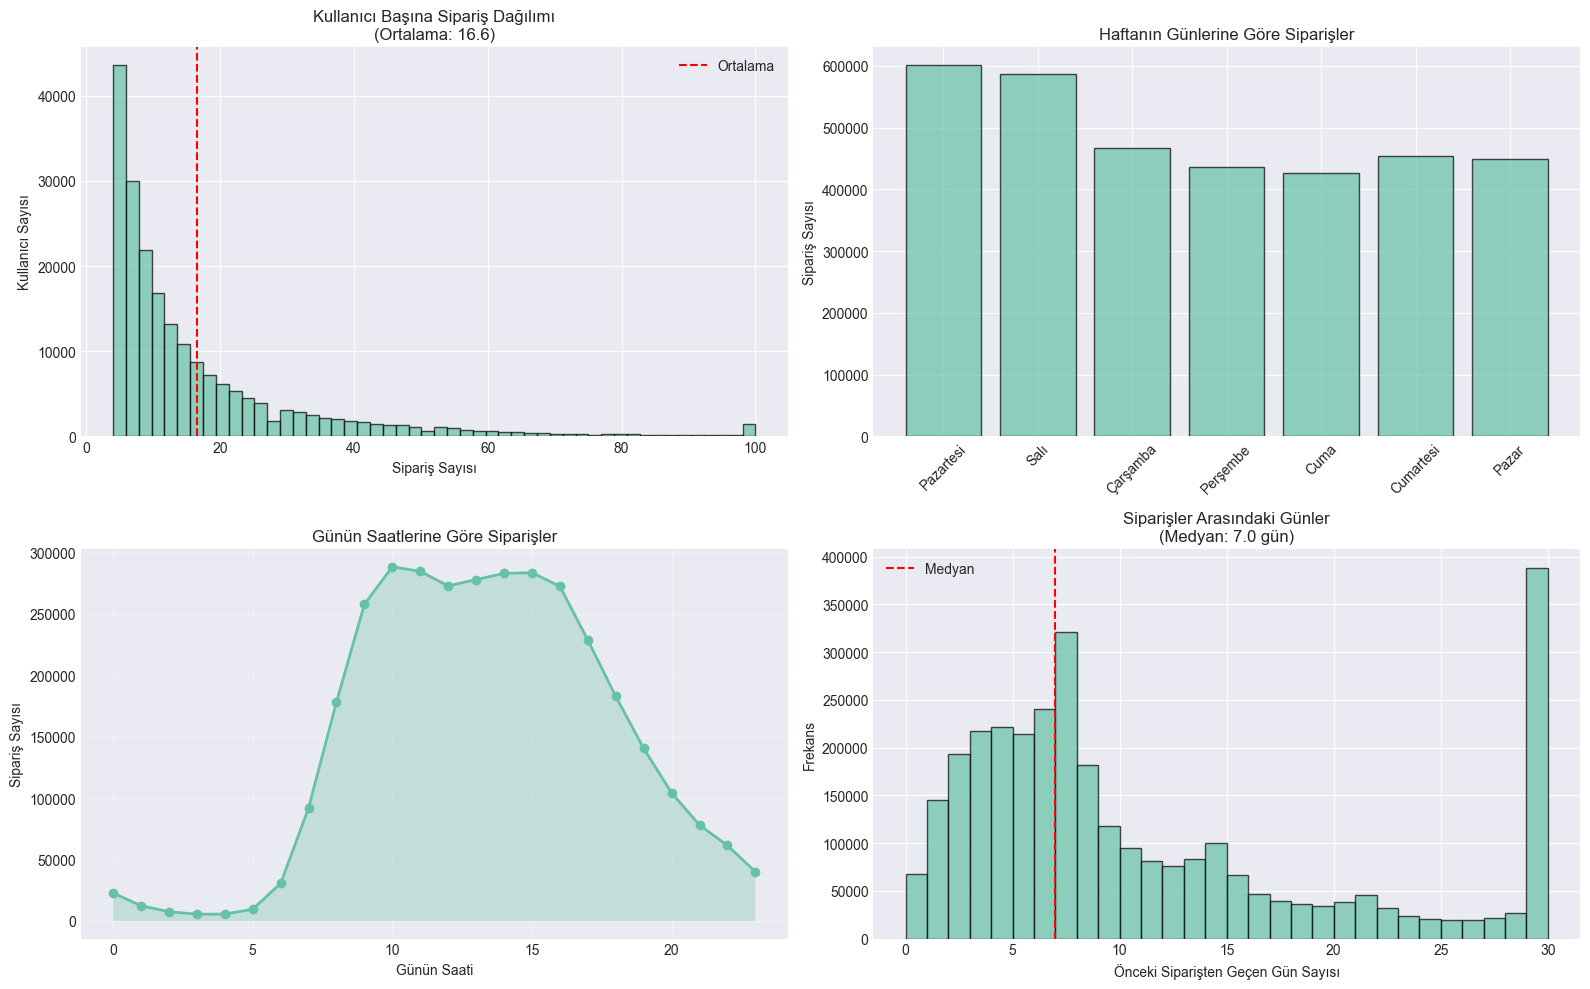

In [19]:
# Sipariş özellikleri dağılımı
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Kullanıcı başına sipariş dağılımı
orders_per_user = orders_df.groupby('user_id').size()
axes[0, 0].hist(orders_per_user, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Sipariş Sayısı')
axes[0, 0].set_ylabel('Kullanıcı Sayısı')
axes[0, 0].set_title(f'Kullanıcı Başına Sipariş Dağılımı\n(Ortalama: {orders_per_user.mean():.1f})')
axes[0, 0].axvline(orders_per_user.mean(), color='red', linestyle='--', label='Ortalama')
axes[0, 0].legend()

# 2. Haftanın günü dağılımı
dow_counts = orders_df['order_dow'].value_counts().sort_index()
dow_names = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
axes[0, 1].bar(range(7), dow_counts.values, alpha=0.7, edgecolor='black')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(dow_names, rotation=45)
axes[0, 1].set_ylabel('Sipariş Sayısı')
axes[0, 1].set_title('Haftanın Günlerine Göre Siparişler')

# 3. Günün saati dağılımı
hour_counts = orders_df['order_hour_of_day'].value_counts().sort_index()
axes[1, 0].plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2)
axes[1, 0].fill_between(hour_counts.index, hour_counts.values, alpha=0.3)
axes[1, 0].set_xlabel('Günün Saati')
axes[1, 0].set_ylabel('Sipariş Sayısı')
axes[1, 0].set_title('Günün Saatlerine Göre Siparişler')
axes[1, 0].grid(True, alpha=0.3)

# 4. Önceki siparişten geçen gün sayısı dağılımı
days_since = orders_df['days_since_prior_order'].dropna()
axes[1, 1].hist(days_since, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Önceki Siparişten Geçen Gün Sayısı')
axes[1, 1].set_ylabel('Frekans')
axes[1, 1].set_title(f'Siparişler Arasındaki Günler\n(Medyan: {days_since.median():.1f} gün)')
axes[1, 1].axvline(days_since.median(), color='red', linestyle='--', label='Medyan')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('../plots/02_orders_univariate.png', dpi=300, bbox_inches='tight')
plt.show()

<h2>
    Grafik Yorumu: Sipariş Özelliklerinin Dağılımı
</h2>

<p>
    Bu görselleştirme, <code>orders</code> veri setindeki temel sipariş özelliklerinin dağılımını dört farklı grafikle analiz etmektedir. Her bir grafik, müşteri davranışını anlamak için önemli bir ipucu sunar.
</p>

<h4>
    1. Kullanıcı Başına Sipariş Dağılımı (Sol Üst)
</h4>
<p>
    Bu histogram, kullanıcıların ne sıklıkla sipariş verdiğini gösterir.
</p>
<ul>
    <li>
        <b>Gözlem:</b> Grafiğin sol tarafında çok yüksek bir yığılma görülmektedir. Bu, müşterilerin büyük bir çoğunluğunun az sayıda (5-10 arası) sipariş verdiğini gösterir. Sipariş sayısı arttıkça, bu kadar çok sipariş veren kullanıcı sayısı hızla düşmektedir.
    </li>
    <li>
        <b>İçgörü:</b> Veri setinde sadık ve çok sık alışveriş yapan küçük bir müşteri kitlesi ("power users") ile, yalnızca birkaç kez alışveriş yapmış çok daha büyük bir kitle bulunmaktadır. Kırmızı çizgiyle belirtilen <b>ortalama 16.6 sipariş değeri</b>, az sayıdaki sadık müşterinin ortalamayı yukarı çektiğini göstermektedir.
    </li>
</ul>


<h4>
    2. Haftanın Günlerine Göre Siparişler (Sağ Üst)
</h4>
<p>
    Bu çubuk grafiği, siparişlerin haftanın hangi günlerinde yoğunlaştığını gösterir.
</p>
<ul>
    <li>
        <b>Gözlem:</b> En yüksek sipariş sayıları <b>Pazartesi ve Salı</b> günlerinde görülmektedir. Haftanın ortasına (Çarşamba, Perşembe, Cuma) doğru hafif bir düşüş yaşanmakta, hafta sonu (Cumartesi, Pazar) ise siparişler tekrar artışa geçmektedir.
    </li>
    <li>
        <b>İçgörü:</b> Müşteriler genellikle haftanın başında ve hafta sonunda alışveriş yapmayı tercih ediyor. Bu bilgi, pazarlama kampanyalarının (örneğin, özel indirimlerin) zamanlaması için kullanılabilir. Örneğin, hafta ortasındaki düşüşü canlandırmak için bu günlere özel promosyonlar düzenlenebilir.
    </li>
</ul>


<h4>
    3. Günün Saatlerine Göre Siparişler (Sol Alt)
</h4>
<p>
    Bu alan grafiği, siparişlerin günün hangi saatlerinde verildiğini gösterir.
</p>
<ul>
    <li>
        <b>Gözlem:</b> Sipariş aktivitesi sabah erken saatlerde (00:00-06:00 arası) en düşük seviyededir. Sabah 07:00'den itibaren hızla artmaya başlar ve en yoğun olduğu zaman dilimi <b>10:00 ile 16:00 arasıdır</b>. Akşam saatlerinden sonra ise gece yarısına doğru tekrar azalır.
    </li>
    <li>
        <b>İçgörü:</b> Müşterilerin büyük bir kısmı gündüz saatlerinde, özellikle öğleden önce ve öğleden sonra alışveriş yapmaktadır. Bu, müşteri hizmetleri ve operasyonel kaynakların (örneğin, kurye planlaması) bu yoğun saatlere göre ayarlanması gerektiğini gösterir.
    </li>
</ul>


<h4>
    4. Siparişler Arasındaki Günler (Sağ Alt)
</h4>
<p>
    Bu histogram, bir müşterinin tekrar sipariş vermesi için geçen ortalama süreyi gösterir.
</p>
<ul>
    <li>
        <b>Gözlem:</b> Grafikte üç belirgin tepe noktası dikkat çekmektedir:
        <ol>
            <li><b>7. günde (en yüksek tepe):</b> Müşterilerin önemli bir kısmı haftalık olarak düzenli sipariş vermektedir. Kırmızı çizgiyle gösterilen <b>medyan değerinin 7 gün olması</b> bu bulguyu desteklemektedir.</li>
            <li><b>30. günde (ikinci en yüksek tepe):</b> Aylık alışveriş alışkanlığına sahip büyük bir müşteri segmenti bulunmaktadır.</li>
            <li><b>14. ve 21. günlerde:</b> İki haftada bir veya üç haftada bir sipariş veren gruplar da mevcuttur.</li>
        </ol>
    </li>
    <li>
        <b>İçgörü:</b> Müşteri tabanında belirgin satın alma döngüleri (haftalık, aylık) vardır. Bu, bir müşterinin beklenen sipariş tarihinde sipariş vermemesi durumunda "churn" riski altında olabileceğini gösterir. Örneğin, her hafta sipariş veren bir müşteri 10 gündür sipariş vermediyse, bu bir risk sinyali olabilir.
    </li>
</ul>

<h2>
    5-Ürün Analizi
</h2>

In [23]:
products_df = data['products']
aisles_df = data['aisles']
departments_df = data['departments']

# Daha iyi analiz için birleştirme
products_full = products_df.merge(aisles_df, on='aisle_id')\
                           .merge(departments_df, on='department_id')

print("Ürün Bilgisi")
print("="*80)
print(f"Toplam Ürün: {len(products_df):,}")
print(f"Toplam Reyon: {len(aisles_df):,}")
print(f"Toplam Departman: {len(departments_df):,}")
print("\nEn Popüler 10 Departman:")
print(products_full['department'].value_counts().head(10))

Ürün Bilgisi
Toplam Ürün: 49,688
Toplam Reyon: 134
Toplam Departman: 21

En Popüler 10 Departman:
department
personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
Name: count, dtype: int64


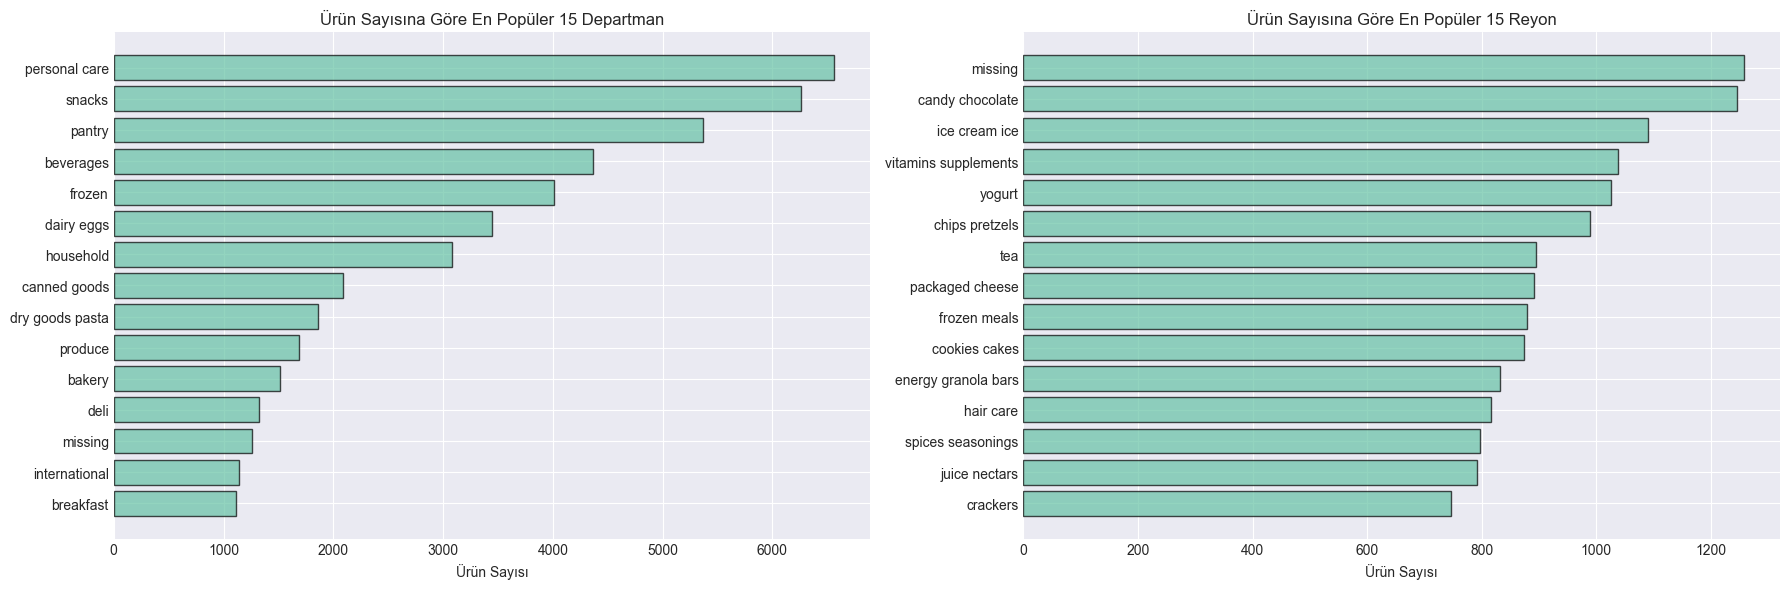

In [24]:
# Departmanları ve reyonları görselleştir
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# En popüler departmanlar
top_depts = products_full['department'].value_counts().head(15)
axes[0].barh(range(len(top_depts)), top_depts.values, alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(top_depts)))
axes[0].set_yticklabels(top_depts.index)
axes[0].set_xlabel('Ürün Sayısı')
axes[0].set_title('Ürün Sayısına Göre En Popüler 15 Departman')
axes[0].invert_yaxis()

# En popüler reyonlar
top_aisles = products_full['aisle'].value_counts().head(15)
axes[1].barh(range(len(top_aisles)), top_aisles.values, alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(top_aisles)))
axes[1].set_yticklabels(top_aisles.index)
axes[1].set_xlabel('Ürün Sayısı')
axes[1].set_title('Ürün Sayısına Göre En Popüler 15 Reyon')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../plots/03_products_categories.png', dpi=300, bbox_inches='tight')
plt.show()

<h2>Grafik Yorumu: Ürün Kategorileri Analizi-Departmanlar ve Reyonlar</h2>
<p>
    Bu bölümde, ürün envanterinin yapısını anlamak için iki ana kategori düzeyinde görselleştirme yapılmıştır: <b>Departmanlar</b> ve <b>Reyonlar</b>. Bu grafikler, hangi kategorilerin en fazla ürün çeşidine sahip olduğunu göstererek şirketin ürün yelpazesi ve odak alanları hakkında önemli bilgiler sunar.
</p>

<hr>

<h4>1. Ürün Sayısına Göre En Popüler 15 Departman</h4>
<p>
    Soldaki grafik, en fazla benzersiz ürüne sahip olan ilk 15 departmanı listelemektedir. Departmanlar, ürünlerin en genel sınıflandırma seviyesidir.
</p>
<ul>
    <li>Grafik, <b>"personal care" (kişisel bakım)</b>, <b>"snacks" (atıştırmalıklar)</b> ve <b>"pantry" (kiler)</b> gibi departmanların en geniş ürün yelpazesine sahip olduğunu açıkça göstermektedir.</li>
    <li>Bu durum, bu kategorilerdeki ürün çeşitliliğinin ne kadar yüksek olduğunu ve müşterilere çok sayıda seçenek sunulduğunu ortaya koyar.</li>
    <li>İşletme açısından bu bilgi, envanter yönetimi ve kategori bazlı pazarlama stratejileri için temel bir göstergedir.</li>
</ul>

<h4>2. Ürün Sayısına Göre En Popüler 15 Reyon</h4>
<p>
    Sağdaki grafik ise daha spesifik bir kategori olan reyonlar (aisles) bazında en fazla ürüne sahip ilk 15 reyonu göstermektedir. Reyonlar, bir departmanın alt kategorileridir ve müşterilerin aradıkları ürünleri bulmak için gezindikleri daha küçük bölümleri temsil eder.
</p>
<ul>
    <li>Bu grafikte en dikkat çekici bulgu, <b>"missing" (kayıp/kategorisiz)</b> reyonunun en başta yer almasıdır. Bu durum, veri setinde henüz bir reyona atanmamış önemli sayıda ürün olduğunu göstermektedir ve veri temizliği için bir işaret olabilir.</li>
    <li>Listenin devamında <b>"candy chocolate" (şekerleme çikolata)</b> ve <b>"ice cream ice" (dondurma buz)</b> gibi spesifik ve popüler tüketim ürünlerinin bulunduğu reyonlar yer almaktadır. Bu, müşterilerin bu tür ürünlerde geniş bir çeşitlilik aradığını düşündürmektedir.</li>
    <li>Bu detaylı analiz, ürün kataloğunun yapısını daha iyi anlamamızı sağlar ve fiziksel mağaza yerleşimi veya web sitesindeki kategori ağacını optimize etmek için değerli veriler sunar.</li>
</ul>

<h2>
    6-Sipariş Ürünleri Analizi
</h2>

In [25]:
# Önceki (prior) ve eğitim (train) verilerini birleştir
order_products = pd.concat([
    data['order_products_prior'],
    data['order_products_train']
], ignore_index=True)

print("Sipariş Ürünleri İstatistikleri")
print("="*80)
print(f"Toplam Sipariş-Ürün Kaydı: {len(order_products):,}")
print(f"Benzersiz Sipariş Sayısı: {order_products['order_id'].nunique():,}")
print(f"Benzersiz Ürün Sayısı: {order_products['product_id'].nunique():,}")
print(f"\nYeniden Sipariş İstatistikleri:")
print(f"Yeniden Sipariş Edilen Ürünler: {order_products['reordered'].sum():,} ({order_products['reordered'].mean()*100:.1f}%)")

Sipariş Ürünleri İstatistikleri
Toplam Sipariş-Ürün Kaydı: 33,819,106
Benzersiz Sipariş Sayısı: 3,346,083
Benzersiz Ürün Sayısı: 49,685

Yeniden Sipariş İstatistikleri:
Yeniden Sipariş Edilen Ürünler: 19,955,360 (59.0%)


In [26]:
# Ürün popülerlik analizi
product_stats = order_products.groupby('product_id').agg({
    'order_id': 'count',
    'reordered': 'mean'
}).rename(columns={'order_id': 'total_orders', 'reordered': 'reorder_rate'})

# Ürün isimleriyle birleştir
product_stats = product_stats.merge(products_df[['product_id', 'product_name']], 
                                    on='product_id')

print("\nEn Popüler 20 Ürün:")
print(product_stats.nlargest(20, 'total_orders')[['product_name', 'total_orders', 'reorder_rate']])


En Popüler 20 Ürün:
                   product_name  total_orders  reorder_rate
24849                    Banana        491291         0.845
13173    Bag of Organic Bananas        394930         0.834
21134      Organic Strawberries        275577         0.778
21900      Organic Baby Spinach        251705         0.774
47205      Organic Hass Avocado        220877         0.798
47762           Organic Avocado        184224         0.761
47622               Large Lemon        160792         0.698
16794              Strawberries        149445         0.700
26206                     Limes        146660         0.682
27842        Organic Whole Milk        142813         0.831
27963       Organic Raspberries        142603         0.769
22932      Organic Yellow Onion        117716         0.698
24961            Organic Garlic        113936         0.682
45004          Organic Zucchini        109412         0.689
39272       Organic Blueberries        105026         0.631
49679            Cu

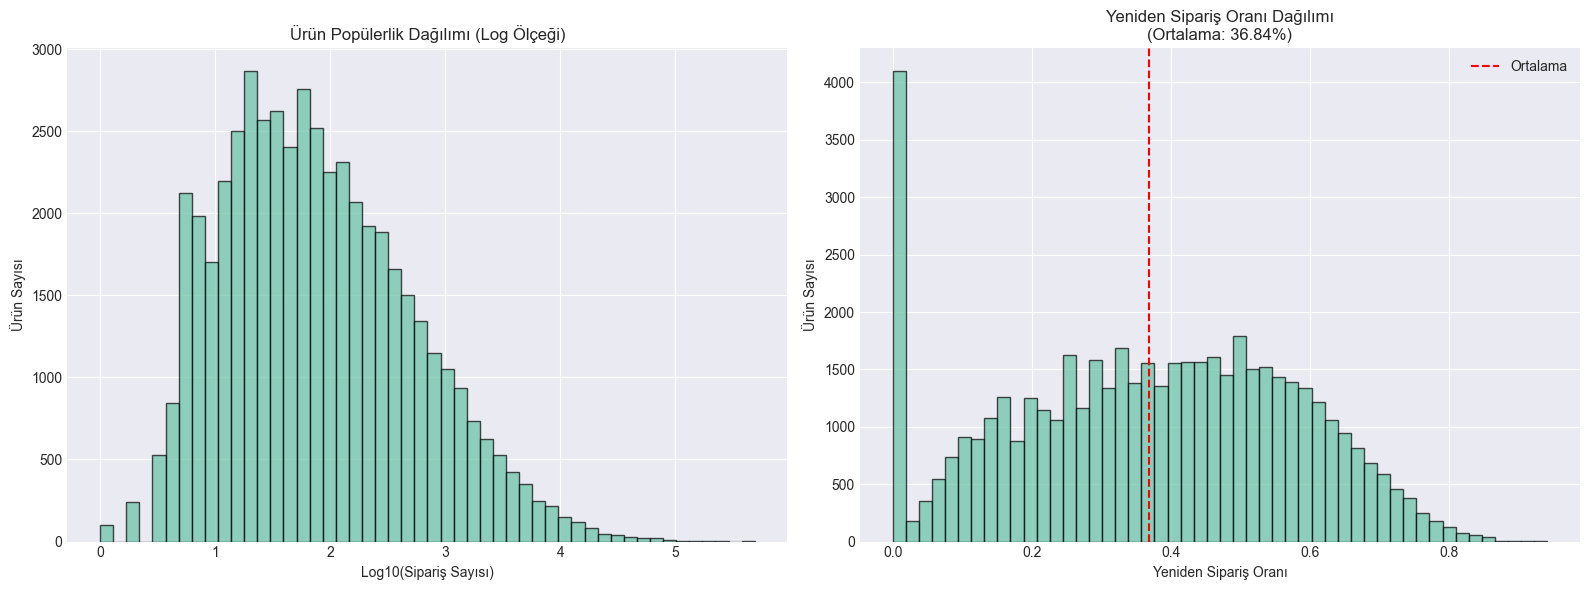

In [27]:
# Ürün metriklerini görselleştir
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ürün sipariş sıklığı
axes[0].hist(np.log10(product_stats['total_orders']), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Log10(Sipariş Sayısı)')
axes[0].set_ylabel('Ürün Sayısı')
axes[0].set_title('Ürün Popülerlik Dağılımı (Log Ölçeği)')

# Yeniden sipariş oranı dağılımı
axes[1].hist(product_stats['reorder_rate'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Yeniden Sipariş Oranı')
axes[1].set_ylabel('Ürün Sayısı')
axes[1].set_title(f'Yeniden Sipariş Oranı Dağılımı\n(Ortalama: {product_stats["reorder_rate"].mean():.2%})')
axes[1].axvline(product_stats['reorder_rate'].mean(), color='red', linestyle='--', label='Ortalama')
axes[1].legend()

plt.tight_layout()
plt.savefig('../plots/04_product_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

<h2>Grafik Yorumu: Ürün Popülerliği ve Yeniden Sipariş Metrikleri Analizi</h2>
<p>
    Bu bölümde, ürünlerin davranışlarını daha derinlemesine incelemek için iki temel metrik analiz edilmiştir: <b>sipariş edilme sıklığı</b> ve <b>yeniden sipariş oranı</b>. Bu iki grafik, hangi ürünlerin en popüler olduğunu ve hangi ürünlerin müşteri sadakati oluşturduğunu anlamamıza yardımcı olur.
</p>

<hr>

<h4>1. Ürün Popülerlik Dağılımı (Logaritmik Ölçek)</h4>
<p>
    Soldaki histogram, ürünlerin ne sıklıkla sipariş edildiğinin dağılımını gösterir.
</p>
<ul>
    <li>
        <b>Logaritmik Ölçek:</b> X ekseninin logaritmik olması, verideki büyük farkları daha anlaşılır kılmak içindir. Grafikten de görüleceği üzere, çok az sayıda ürün (örneğin muz gibi) aşırı derecede popülerken, ürünlerin büyük bir çoğunluğu ("uzun kuyruk") çok daha az sayıda sipariş edilmektedir.
    </li>
    <li>
        <b>Yorum:</b> Bu dağılım, e-ticaret platformlarında sıkça görülen bir durumdur. İşletmenin gelirinin önemli bir kısmı, popüler olan küçük bir ürün grubundan geliyor olabilir. Aynı zamanda, niş veya nadiren satın alınan geniş bir ürün yelpazesi de bulunmaktadır.
    </li>
</ul>


<h4>2. Yeniden Sipariş Oranı Dağılımı</h4>
<p>
    Sağdaki histogram, ürünlerin yeniden sipariş edilme oranlarının dağılımını göstermektedir. Yeniden sipariş oranı, bir ürünün ilk satın alımdan sonra ne kadar sık tekrar satın alındığını ölçer.
</p>
<ul>
    <li>
        <b>Grafik Analizi:</b> Grafikte iki ana yığılma dikkat çeker:
        <ul>
            <li><b>Sıfıra yakın yığılma:</b> Çok sayıda ürünün yalnızca bir kez satın alındığını ve bir daha asla sipariş edilmediğini gösterir. Bunlar genellikle tek seferlik denenen veya ihtiyaca yönelik ürünlerdir.</li>
            <li><b>Daha yüksek oranlardaki yığılma:</b> Süt, yumurta, su gibi temel tüketim maddelerinin veya müşterilerin favori atıştırmalıklarının bu grupta yer alması muhtemeldir. Bu ürünler, yüksek müşteri sadakati göstergesidir.</li>
        </ul>
    </li>
    <li>
        <b>Ortalama (Kırmızı Çizgi):</b> Tüm ürünler arasındaki <b>ortalama yeniden sipariş oranını</b> gösterir. Bu, genel olarak müşteri sadakatinin bir özeti olarak düşünülebilir.
    </li>
</ul>

<h2>
    EDA BULGULARI - Sonraki Adımlar
</h2>

<p>
    <b>
        Bu notebook'ta temel bir Keşifsel Veri Analizi (EDA) gerçekleştirdik. Sonraki adımlar şunlardır:
    </b>
</p>    

<ol>
    <li><b>Müşteri Kaybı (Churn) Tanımı:</b> Bu notebook'un "Problem Tanımı ve İş Bağlamı" bölümünde belirtildiği gibi, müşteri kaybı yaşayan müşterileri <b>2 hafta (14 gün) önceden</b> tahmin edebilecek bir sistem kurmayı hedefliyoruz. Bu nedenle, bir müşterinin churn olup olmadığını belirlemek için son siparişinden bu yana geçen süre gibi metrikler kritik olacaktır.</li>
    <li><b>Özellik Mühendisliği (Feature Engineering):</b> EDA sırasında analiz ettiğimiz temel verilerden (sipariş sıklığı, günün saatine göre siparişler, sepet büyüklüğü vb.) yararlanarak yeni ve anlamlı özellikler oluşturmak. Bu adım, modelin performansını artırmak için kritik öneme sahiptir.</li>
    <li><b>Temel Model (Baseline Model):</b> Özellik mühendisliği tamamlandıktan sonra, model performansını ölçmek için bir başlangıç noktası oluşturacak basit bir model (örneğin, Logistic Regression) kurmak.</li>
    <li><b>Gelişmiş Modeller:</b> Temel modelin performansına göre XGBoost, LightGBM ve CatBoost gibi daha karmaşık ve genellikle daha yüksek doğruluk sunan modelleri denemek.</li>
</ol>

<p>
    <b>Devam etmek için:</b> `02_feature_engineering.ipynb` notebook'una geçin!
</p>